Based on: https://blog.dask.org/2018/02/09/credit-models-with-dask

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [1]:
hist_yrs = range(10)
incomes = range(10)

In [2]:
def default(hist, income):
    return (hist + 1) ** 2 + (income / 2)

In [3]:
from dask import delayed

@delayed
def increment(x):
    return x + 1

@delayed
def halve(y):
    return y / 2

@delayed
def default(hist, income):
    return hist**2 + income

In [4]:
inc_hist = [increment(n) for n in hist_yrs]
inc_hist

[Delayed('increment-60fb51de-0522-4646-8647-a3a4d368e57d'),
 Delayed('increment-ea15df9a-5d62-4af9-a9cd-2cb67a78f4cf'),
 Delayed('increment-7486fa89-bf85-476c-9ff2-6306e87b21ed'),
 Delayed('increment-3fb3d518-c6d4-4649-b4d1-a3263a5569e2'),
 Delayed('increment-4348f1b7-223f-4da7-a8bf-3a1c2c4e6ff4'),
 Delayed('increment-b785f628-dc37-415d-af09-551aaa23ec99'),
 Delayed('increment-06e5359c-8132-44ff-b367-988318c103c1'),
 Delayed('increment-5206b9d3-2fc8-45fa-9244-de70e3f5f02c'),
 Delayed('increment-a62c9452-2f56-4357-be22-d787ea251316'),
 Delayed('increment-71f56586-e622-4e79-8408-fd5c5c0c1bf3')]

In [5]:
halved_income = [halve(n) for n in incomes]
halved_income

[Delayed('halve-9b02f792-0b59-4353-a68a-9ebbc02a7ac3'),
 Delayed('halve-ed7b5649-7c34-4799-961f-e642f4d415b1'),
 Delayed('halve-4c88108c-43d2-4b57-9274-85aae4f82a50'),
 Delayed('halve-e24a2b18-7689-4ec7-8a47-f21963f91e8c'),
 Delayed('halve-2508b330-64c1-4b47-a984-6f2c5c21d07f'),
 Delayed('halve-2cbca0f2-e625-48cf-a11a-545c22dbc9e1'),
 Delayed('halve-7d46b27b-1c22-4048-a132-535dd456978c'),
 Delayed('halve-03e1acef-79e2-4b27-b4e9-adedc574020b'),
 Delayed('halve-682dfcca-5917-4597-95cb-229fd33426ca'),
 Delayed('halve-644b88f2-0e40-4463-aa39-1b2c57bffe20')]

In [6]:
estimated_default = [default(hist, income) for hist, income in zip(inc_hist, halved_income)]
estimated_default

[Delayed('default-29dc4e4c-9bc2-4748-aa19-a55e7da36ca3'),
 Delayed('default-dd45820d-d7bb-44cc-9e5b-4cf53ea25313'),
 Delayed('default-24c75da0-f1bd-4cdb-9881-63fa8bf69a4c'),
 Delayed('default-742ec046-53ec-4edc-aeda-1ec656249a6d'),
 Delayed('default-7cae9061-76e6-4b68-af7f-2f48a0c9c6c5'),
 Delayed('default-e57e30fd-80ba-47cc-8fea-cb8517a253cb'),
 Delayed('default-da651421-9eb7-4ee2-9d93-84d1e230fa41'),
 Delayed('default-f06906a3-47ad-4908-b3d1-175b888975f8'),
 Delayed('default-ca323689-03db-493f-8929-bfd728de3e12'),
 Delayed('default-7688f685-d983-40d8-956c-844d170a7ce0')]

In [7]:
@delayed
def agg(x, y):
    return x + y

def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]

default_sum = merge(estimated_default)

In [8]:
default_sum

[Delayed('agg-26842e14-6702-4f41-bd9d-c2fcc66015be')]

In [9]:
avg_default = default_sum[0] / 10
avg_default.compute()  # 40.75

40.75

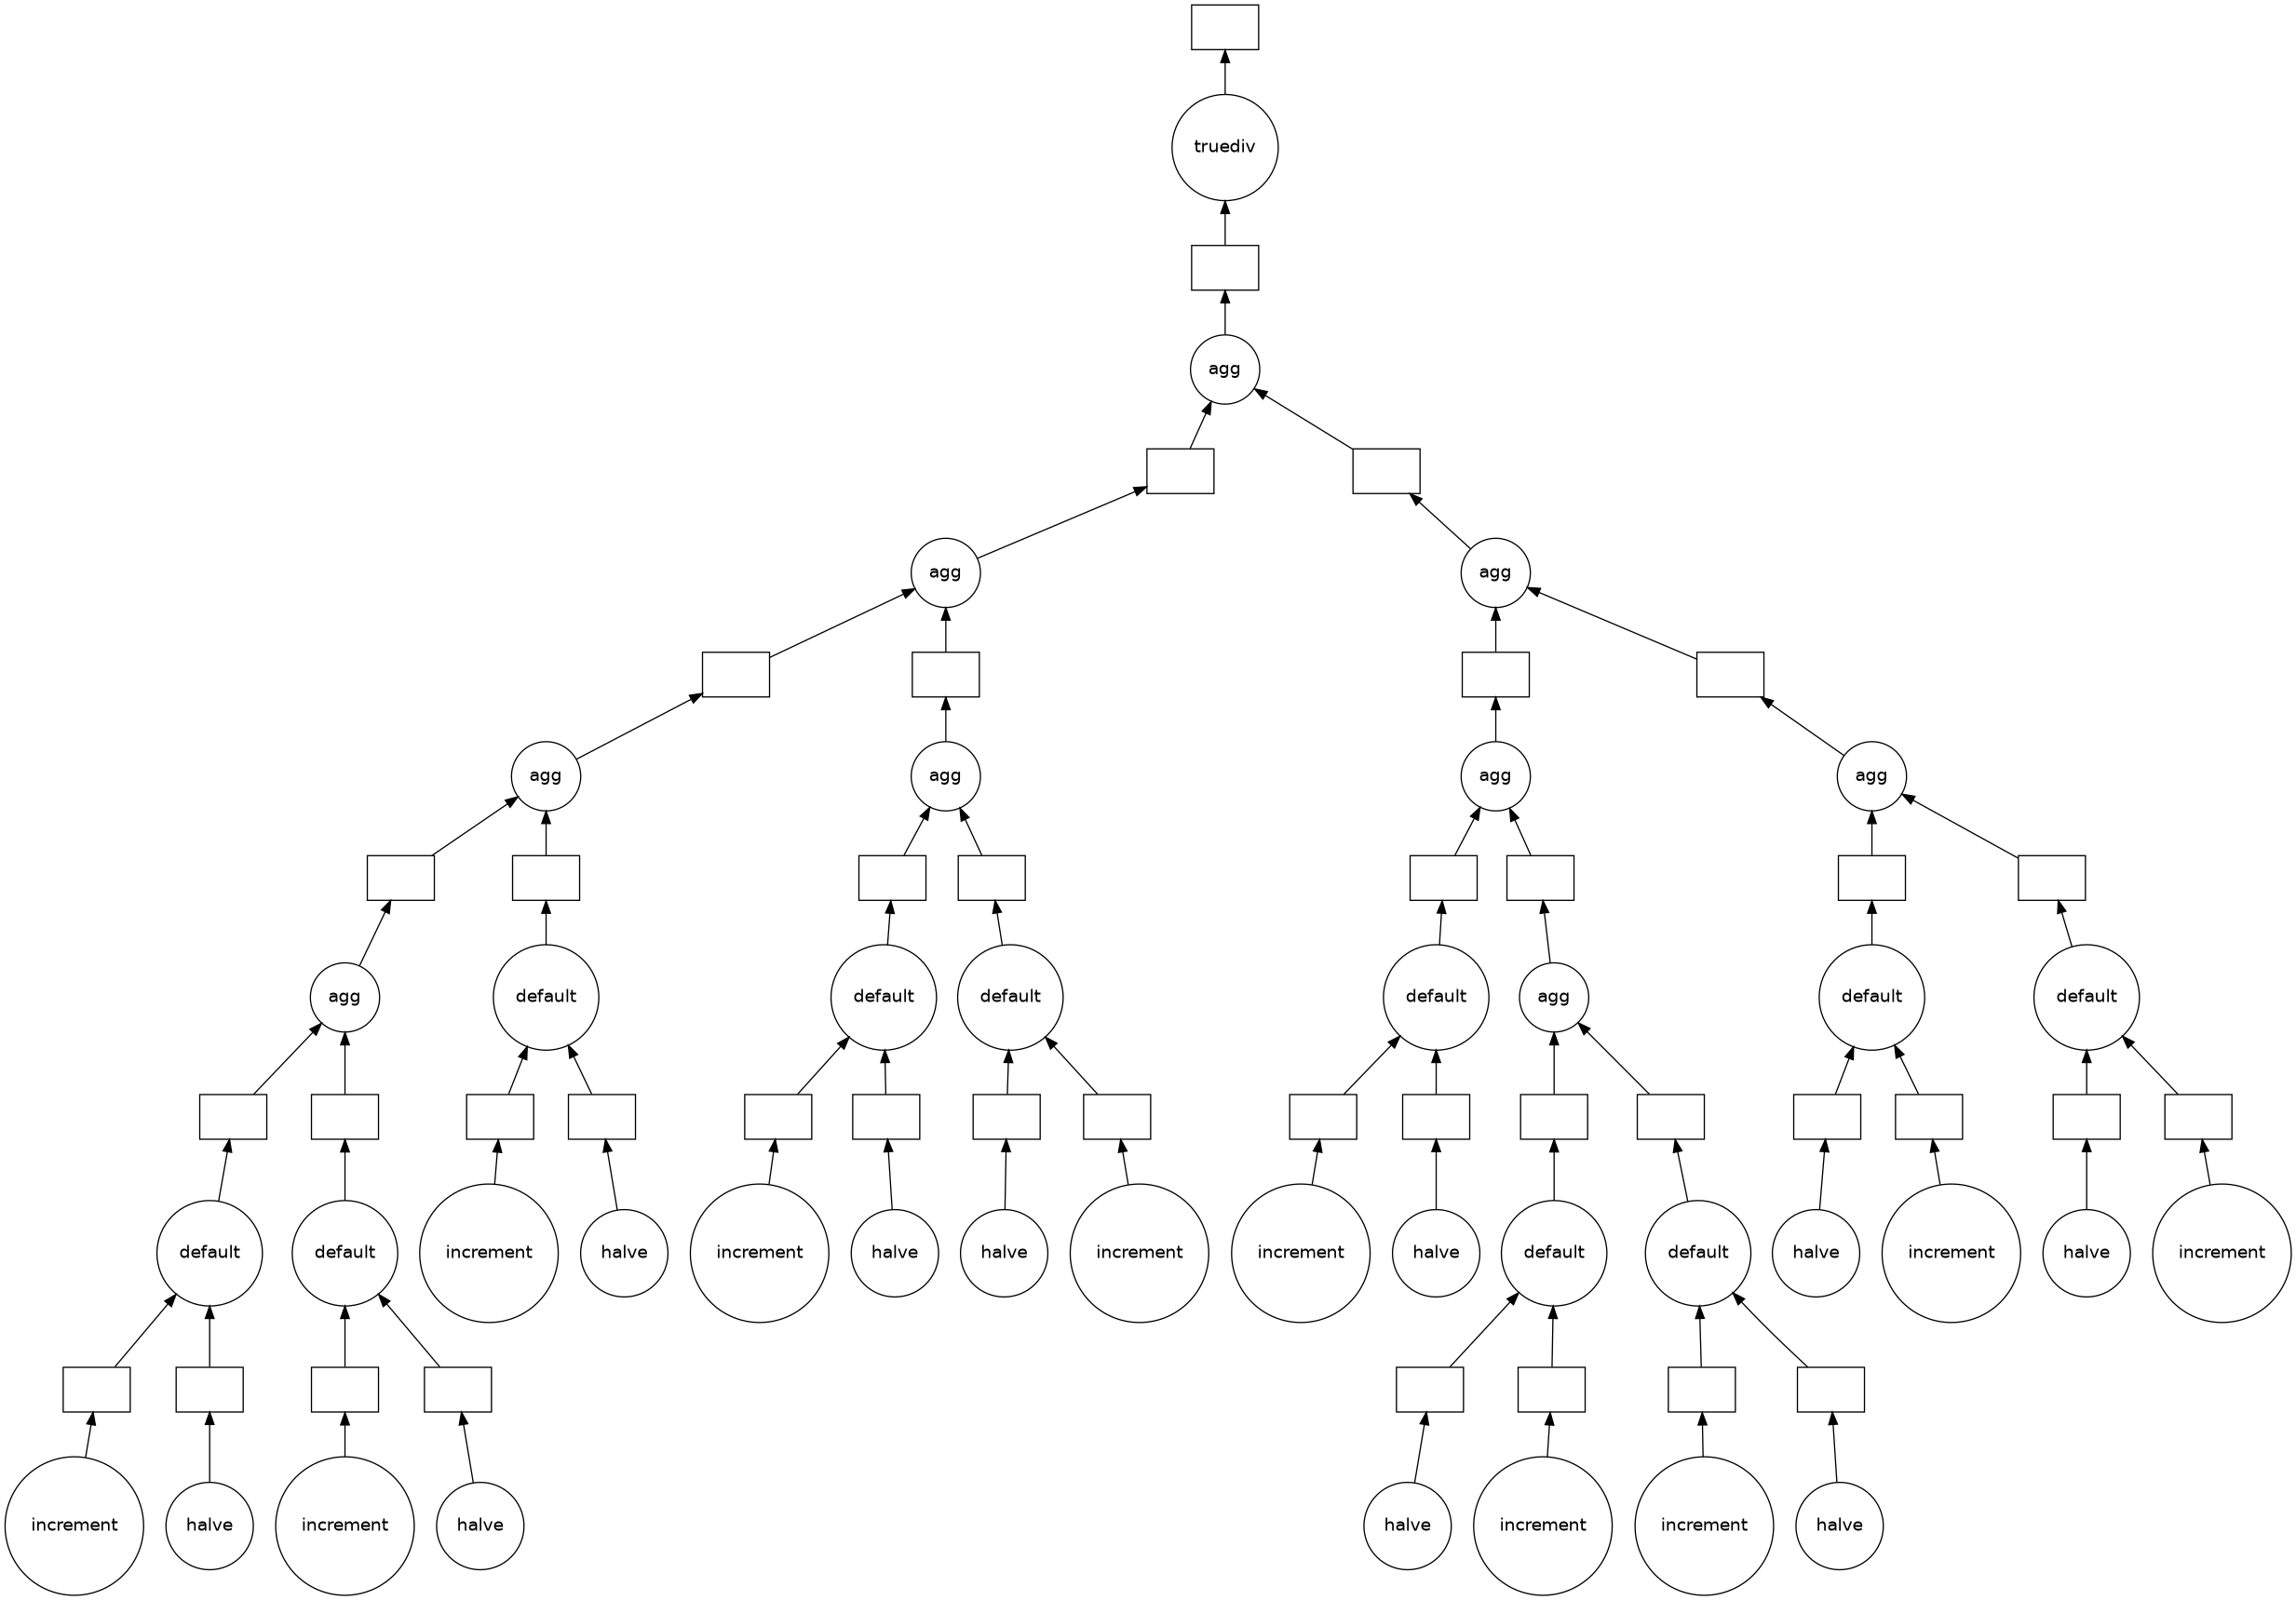

In [10]:
avg_default.visualize()

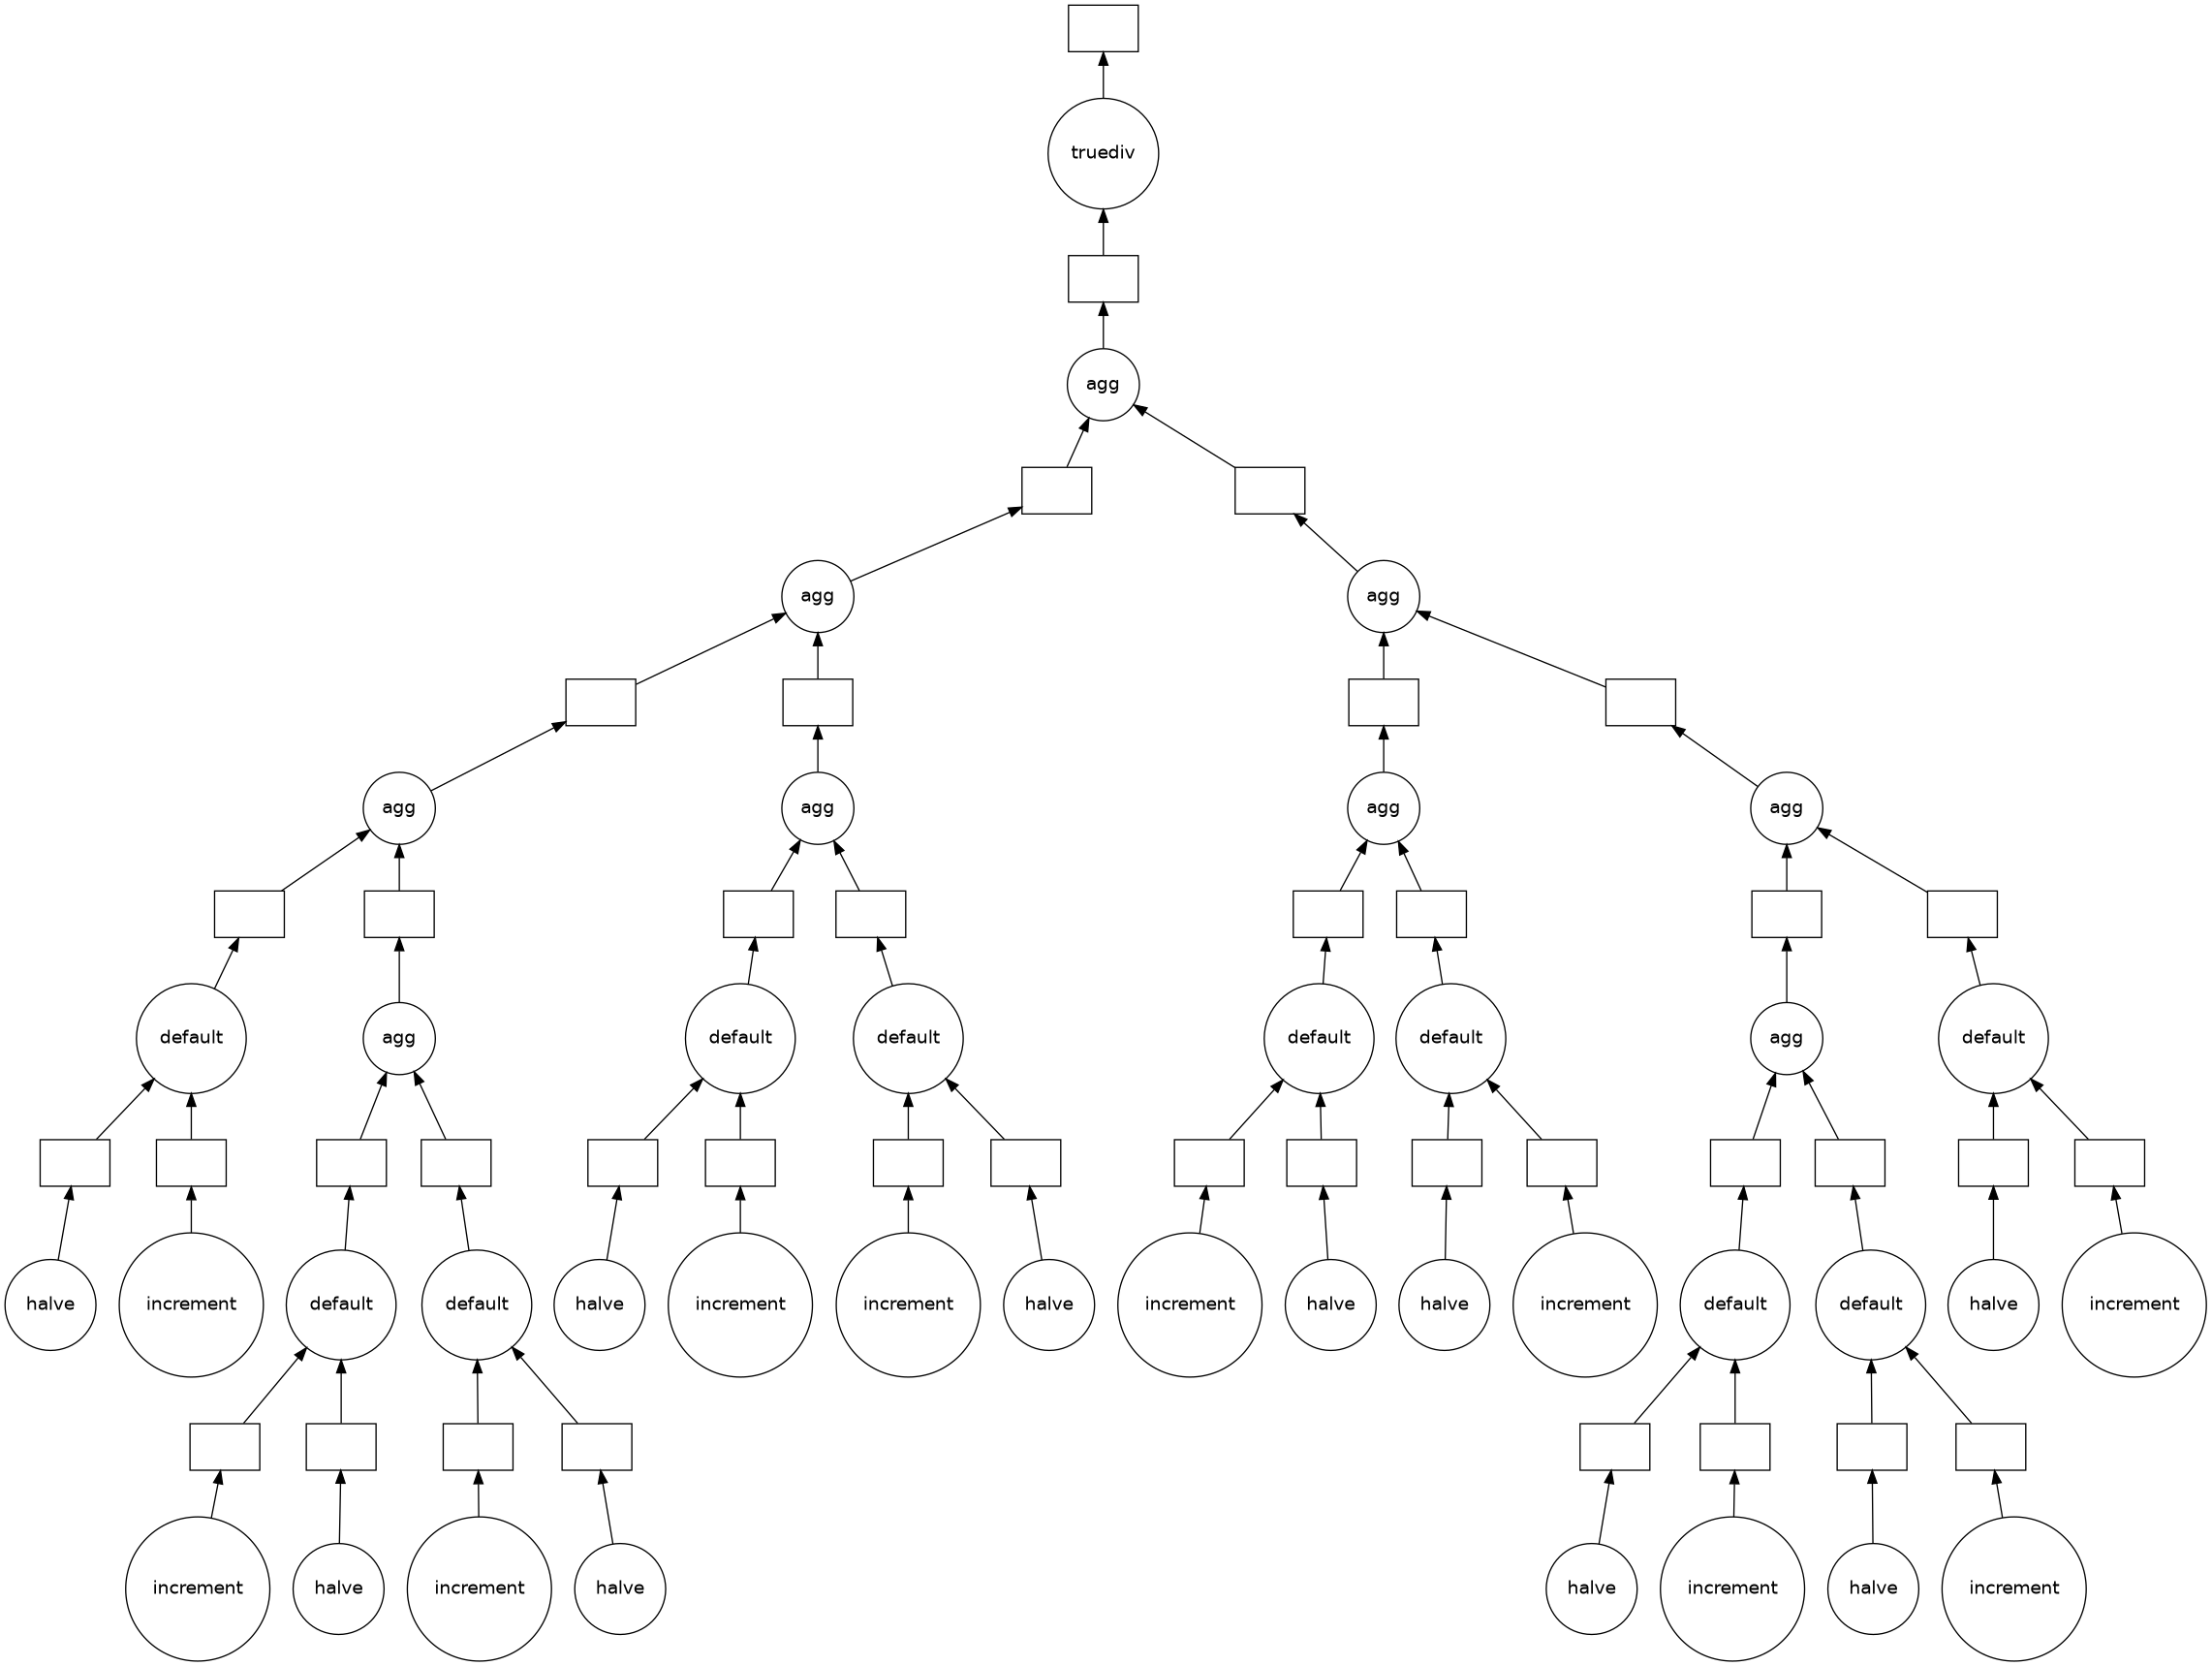

In [ ]:
# End-to-end

from dask import delayed


@delayed
def increment(x):
    return x + 1


@delayed
def halve(y):
    return y / 2


@delayed
def default(hist, income):
    return hist**2 + income


@delayed
def agg(x, y):
    return x + y


def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]


hist_yrs = range(10)
incomes = range(10)
inc_hist = [increment(n) for n in hist_yrs]
halved_income = [halve(n) for n in incomes]
estimated_defaults = [default(hist, income) for hist, income in zip(inc_hist, halved_income)]
default_sum = merge(estimated_defaults)
avg_default = default_sum[0] / 10
avg_default.compute()
avg_default.visualize()  # requires graphviz and python-graphviz to be installed

### Non-distributed version

In [ ]:
import numpy as np

In [12]:
hist_yrs = range(10)
incomes = range(10)

In [18]:
hist_yrs

range(0, 10)

In [19]:
incomes

range(0, 10)

In [13]:
def default(hist, income):
    return (hist + 1) ** 2 + (income / 2)

In [14]:
def increment(x):
    return x + 1

In [15]:
def halve(y):
    return y / 2

In [16]:
def default(hist, income):
    return hist**2 + income

In [17]:
inc_hist = [increment(n) for n in hist_yrs]
inc_hist

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
halved_income = [halve(n) for n in incomes]
halved_income

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

In [22]:
estimated_default = [default(hist, incomes) for hist, incomes in zip(inc_hist, halved_income)]
estimated_default

[1.0, 4.5, 10.0, 17.5, 27.0, 38.5, 52.0, 67.5, 85.0, 104.5]

In [23]:
def agg(x, y):
    return x + y

In [24]:
def merge(seq):
    if len(seq) < 2:
        return seq
    middle = len(seq)//2
    left = merge(seq[:middle])
    right = merge(seq[middle:])
    if not right:
        return left
    return [agg(left[0], right[0])]

In [27]:
default_sum = merge(estimated_default)
default_sum

[407.5]

In [33]:
sum_default = np.sum(default_sum)
sum_default

np.float64(407.5)

In [35]:
avg_default = default_sum[0] / 10
avg_default

40.75

In [36]:
default_avg = sum_default / 10
default_avg

np.float64(40.75)